In [ ]:
!pip install anndata
!pip install delayedarray
!pip install pyometiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 532.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 17.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import anndata
import pyometiff
import numpy

Mounted at /content/drive


In [ ]:
# drive.mount('/content/drive') # use if you plan to use colab.
PATH_TO_FOLDER = drive.mount('/content/drive')
TRAIN_DATA_PATH = 'drive/MyDrive/train'
ORIGINAL_IMAGE_DATA_SUBDIR = 'images_masks'
ORIGINAL_MASKS_SUBDIR = 'masks'
ORIGINAL_IMAGES_SUBDIR = 'img'

# if PATH_TO_FOLDER is None:
#     raise ValueError('Please set PATH_TO_FOLDER to a path with unzipped training data.')

ANNDATA_PATH = 'cell_data.h5ad'
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)
train_anndata.obs.head()

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,...,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,...,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,...,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor


### arcsin transformation

In [ ]:
imgs_paths = os.listdir(TRAIN_IMAGE_DATA_IMAGES)
masks_paths = os.listdir(TRAIN_IMAGE_DATA_MASKS)
imgs = [pyometiff.OMETIFFReader(fpath=os.path.join(TRAIN_IMAGE_DATA_IMAGES, path)).read()[0] for path in imgs_paths]
masks = [pyometiff.OMETIFFReader(fpath=os.path.join(TRAIN_IMAGE_DATA_MASKS, path)).read()[0] for path in masks_paths]

In [ ]:
for zdj, name in zip(imgs, imgs_paths):
    image_array = numpy.arcsinh(zdj / 5.0)
    shape = image_array.shape
    image_array = image_array.reshape(shape[0], shape[1], shape[2])
    writer = pyometiff.OMETIFFWriter(fpath = f'drive/MyDrive/train_transformed/{name}', array = image_array, metadata={"0": "0"})
    writer.write()

<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 599)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 530, 530)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)
<<<< (40, 600, 600)


In [ ]:
import matplotlib.pyplot as plt

### after transformation

In [ ]:
image_directory = 'drive/MyDrive/train_transformed'
image_path = os.path.join(image_directory, 'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004.tiff')
mask_path = os.path.join(TRAIN_IMAGE_DATA_MASKS, 'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004.tiff')

image_reader = pyometiff.OMETIFFReader(fpath=image_path)
mask_reader = pyometiff.OMETIFFReader(fpath=mask_path)


image_array, _, _ = image_reader.read()
mask_array, _, _ = mask_reader.read()

Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range


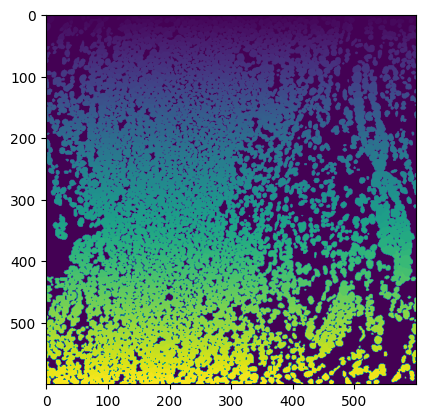

In [ ]:
plt.imshow(mask_array)

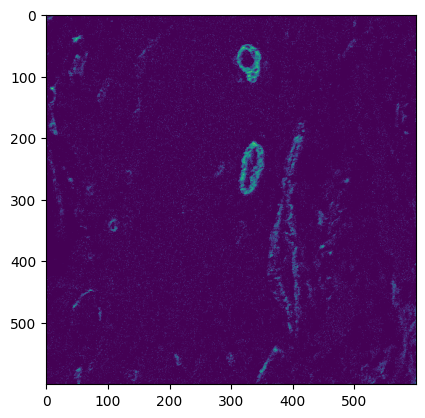

In [ ]:
plt.imshow(image_array[2])